# リポジトリクローン

In [ ]:
!git clone https://github.com/Intellindust-AI-Lab/DEIMv2
%cd DEIMv2

# パッケージインストール

In [ ]:
!pip install -q faster_coco_eval calflops
!pip install -q onnx onnxsim onnxruntime

# 重みダウンロード

In [3]:
!mkdir model

In [ ]:
import gdown

# Atto
gdown.download(
    'https://drive.google.com/uc?id=18sRJXX3FBUigmGJ1y5Oo_DPC5C3JCgYc',
    'model/deimv2_hgnetv2_atto_coco.pth',
    quiet=False,
)
# Femto
gdown.download(
    'https://drive.google.com/uc?id=16hh6l9Oln9TJng4V0_HNf_Z7uYb7feds',
    'model/deimv2_hgnetv2_femto_coco.pth',
    quiet=False,
)
# Pico
gdown.download(
    'https://drive.google.com/uc?id=1PXpUxYSnQO-zJHtzrCPqQZ3KKatZwzFT',
    'model/deimv2_hgnetv2_pico_coco.pth',
    quiet=False,
)
# N
gdown.download(
    'https://drive.google.com/uc?id=1G_Q80EVO4T7LZVPfHwZ3sT65FX5egp9K',
    'model/deimv2_hgnetv2_n_coco.pth',
    quiet=False,
)
# S
gdown.download(
    'https://drive.google.com/uc?id=1MDOh8UXD39DNSew6rDzGFp1tAVpSGJdL',
    'model/deimv2_dinov3_s_coco.pth',
    quiet=False,
)
# M
gdown.download(
    'https://drive.google.com/uc?id=1nPKDHrotusQ748O1cQXJfi5wdShq6bKp',
    'model/deimv2_dinov3_m_coco.pth',
    quiet=False,
)
# L
gdown.download(
    'https://drive.google.com/uc?id=1dRJfVHr9HtpdvaHlnQP460yPVHynMray',
    'model/deimv2_dinov3_l_coco.pth',
    quiet=False,
)
# X
gdown.download(
    'https://drive.google.com/uc?id=1pTiQaBGt8hwtO0mbYlJ8nE-HGztGafS7',
    'model/deimv2_dinov3_x_coco.pth',
    quiet=False,
)

In [5]:
!mkdir ckpts

In [ ]:
import gdown

# ViT
gdown.download(
    'https://drive.google.com/uc?id=1YMTq_woOLjAcZnHSYNTsNg7f0ahj5LPs',
    'ckpts/vitt_distill.pt',
    quiet=False,
)
# ViT+
gdown.download(
    'https://drive.google.com/uc?id=1COHfjzq5KfnEaXTluVGEOMdhpuVcG6Jt',
    'ckpts/vittplus_distill.pt',
    quiet=False,
)
# dinov3_vits16.pth は 以下のURLからダウンロードして格納する
# https://github.com/facebookresearch/dinov3
# https://ai.meta.com/resources/models-and-libraries/dinov3-downloads/

# ONNX変換

In [ ]:
# Atto
!python tools/deployment/export_onnx.py \
    --check \
    --simplify \
    -c configs/deimv2/deimv2_hgnetv2_atto_coco.yml \
    -r model/deimv2_hgnetv2_atto_coco.pth

# Femto
!python tools/deployment/export_onnx.py \
    --check \
    --simplify \
    -c configs/deimv2/deimv2_hgnetv2_femto_coco.yml \
    -r model/deimv2_hgnetv2_femto_coco.pth

# Pico
!python tools/deployment/export_onnx.py \
    --check \
    --simplify \
    -c configs/deimv2/deimv2_hgnetv2_pico_coco.yml \
    -r model/deimv2_hgnetv2_pico_coco.pth

# N
!python tools/deployment/export_onnx.py \
    --check \
    --simplify \
    -c configs/deimv2/deimv2_hgnetv2_n_coco.yml \
    -r model/deimv2_hgnetv2_n_coco.pth

# 以下は、vitt_distill.pt、vittplus_distill.pt、dinov3_vits16.pth を ckptsに格納必要
# S以上のモデルの変換は、ハイメモリ(51GB)ではメモリオーバー
# S
# !python tools/deployment/export_onnx.py \
#     --check \
#     --simplify \
#     -c configs/deimv2/deimv2_dinov3_s_coco.yml \
#     -r model/deimv2_dinov3_s_coco.pth

# # M
# !python tools/deployment/export_onnx.py \
#     --check \
#     --simplify \
#     -c configs/deimv2/deimv2_dinov3_m_coco.yml \
#     -r model/deimv2_dinov3_m_coco.pth

# # L
# !python tools/deployment/export_onnx.py \
#     --check \
#     --simplify \
#     -c configs/deimv2/deimv2_dinov3_l_coco.yml \
#     -r model/deimv2_dinov3_l_coco.pth

# # X
# !python tools/deployment/export_onnx.py \
#     --check \
#     --simplify \
#     -c configs/deimv2/deimv2_dinov3_x_coco.yml \
#     -r model/deimv2_dinov3_x_coco.pth

# 推論テスト

In [8]:
!wget -q https://raw.githubusercontent.com/Kazuhito00/DEIM-ONNX-Sample/refs/heads/main/asset/test.jpg -O test.jpg

In [9]:
import onnxruntime

# モデル読み込み
onnx_session = onnxruntime.InferenceSession(
    'model/deimv2_hgnetv2_n_coco.onnx',
    providers=[
        'CPUExecutionProvider',
    ],
)
input_size = onnx_session.get_inputs()[0].shape
input_width, input_height = input_size[3], input_size[2]

print(onnx_session.get_providers())
print('input size:',input_size)

['CPUExecutionProvider']
input size: ['N', 3, 640, 640]


In [10]:
import cv2
import numpy as np

# 画像読み込み
image = cv2.imread('test.jpg')
image_height, image_width, _ = image.shape
original_size = np.array([[image_width, image_height]], dtype=np.int64)

# 前処理：BGR->RGB、リサイズ、正規化、NCHW
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (input_width, input_height))
input_image = input_image.astype(np.float32) / 255.0
input_image = np.transpose(input_image, (2, 0, 1))
input_image = np.expand_dims(input_image, axis=0)

In [11]:
%%time

# 推論
output = onnx_session.run(
    None,
    input_feed={'images': input_image, "orig_target_sizes": original_size}
)

labels, bboxes, scores = output

CPU times: user 349 ms, sys: 21.8 ms, total: 370 ms
Wall time: 95 ms


In [12]:
%%timeit

# 時間計測
_ = onnx_session.run(
    None,
    input_feed={'images': input_image, "orig_target_sizes": original_size}
)

94.2 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 結果確認

In [13]:
import copy

# 描画
debug_image = copy.deepcopy(image)
score_threshold = 0.6

for label, bbox, score in zip(labels[0], bboxes[0], scores[0]):
    if score < score_threshold:
        continue

    cv2.rectangle(
        debug_image,
        (int(bbox[0]), int(bbox[1])),
        (int(bbox[2]), int(bbox[3])),
        (0, 255, 0),
        2,
    )
    cv2.putText(
        debug_image,
        str(label),
        (int(bbox[0]), int(bbox[1]-8)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        2,
    )

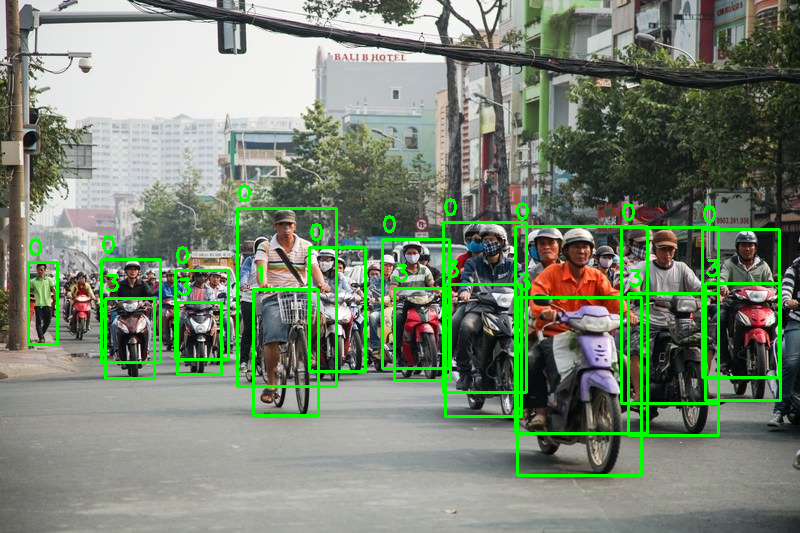

In [14]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)

# ダウンロード

In [15]:
!find model -type f -name "*.onnx" | zip model.zip -@

  adding: model/deimv2_hgnetv2_pico_coco.onnx (deflated 11%)
  adding: model/deimv2_hgnetv2_femto_coco.onnx (deflated 13%)
  adding: model/deimv2_hgnetv2_atto_coco.onnx (deflated 17%)
  adding: model/deimv2_hgnetv2_n_coco.onnx (deflated 10%)


In [16]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>